### Data Roles Venn
Author: Shane Butler
Desc: Creates venn diagram of data roles based on skills

#### Setup Environment

In [1]:
# Import necessary libraries
import os
from dotenv import load_dotenv
import pandas as pd
import gspread
from oauth2client.service_account import ServiceAccountCredentials
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn3
from upsetplot import UpSet, from_contents


In [2]:
# Load environment variables from .env file
load_dotenv()
# Retrieve the path to your service account JSON file from the environment variable
credentials_path = os.getenv('GOOGLE_APPLICATION_CREDENTIALS')
# Define the scope
scope = ["https://spreadsheets.google.com/feeds", "https://www.googleapis.com/auth/drive"]
# Authorize the client using the service account credentials
creds = ServiceAccountCredentials.from_json_keyfile_name(credentials_path, scope)
client = gspread.authorize(creds)

#### Get Data

In [26]:
# Open the Google Sheet
sheet = client.open('data_role_skills')
worksheet = sheet.worksheet('data_skills_to_role_map')
# Extract all data into a pandas DataFrame
data = worksheet.get_all_records()
df = pd.DataFrame(data)

In [27]:
# Display the first few rows to check the data
df.head()  

,role,skill_category,skill
0,Data Platform Engineer,Programming Languages,Python
1,Data Platform Engineer,Programming Languages,Java
2,Data Platform Engineer,Data Management and Infrastructure,"Cloud Platforms (AWS, Azure, GCP)"
3,Data Platform Engineer,Data Management and Infrastructure,"Data Warehousing (Redshift, Snowflake, BigQuery)"
4,Data Platform Engineer,Data Management and Infrastructure,Data Lakes


In [28]:
df['role'].unique()

array(['Data Platform Engineer', 'Data Engineer', 'Data Analyst',
       'Data Scientist - Product',
       'Research Data Scientist / Applied Data Scientist / Data Scientist - ML',
       'Machine Learning Engineer', 'ML Ops Engineer', 'Gen AI Engineer'],
      dtype=object)

In [29]:
# Define roles and their associated skills
role1 = 'Data Analyst'
role2 = 'Data Engineer'

skills_role1 = set(df[df['role'] == role1]['skill'])
skills_role2 = set(df[df['role'] == role2]['skill'])

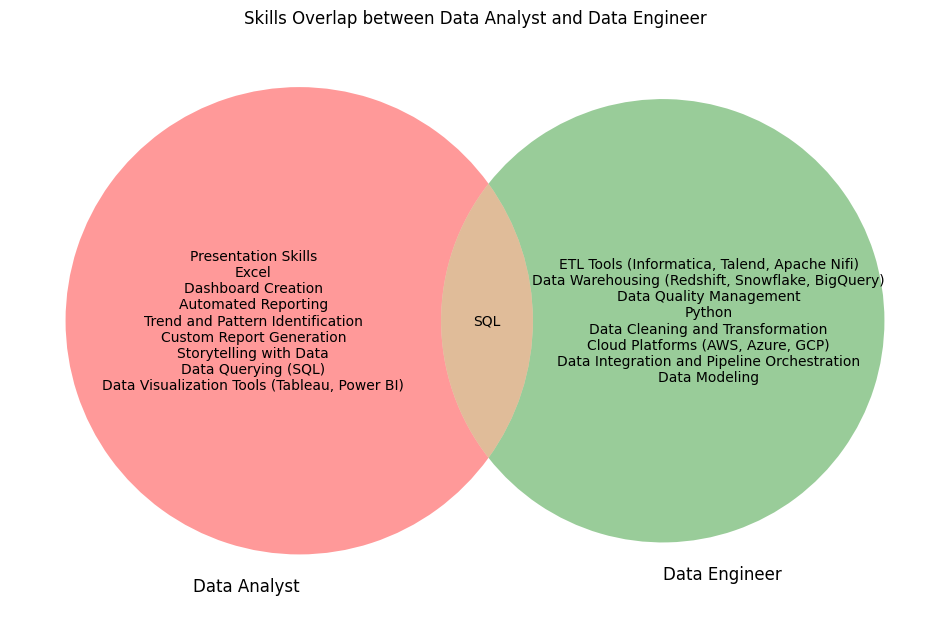

In [31]:

# Calculate overlapping and unique skills
only_role1 = skills_role1 - skills_role2
only_role2 = skills_role2 - skills_role1
overlap = skills_role1 & skills_role2

# Create labels for the Venn diagram
labels = {
    '10': '\n'.join(only_role1),
    '01': '\n'.join(only_role2),
    '11': '\n'.join(overlap),
}

# Create a Venn Diagram
plt.figure(figsize=(12, 8))
venn = venn2([skills_role1, skills_role2], (role1, role2))

# Update Venn diagram labels
for idx, label in labels.items():
    venn.get_label_by_id(idx).set_text(label)

plt.title(f'Skills Overlap between {role1} and {role2}')
plt.show()

/Users/sabutler/dataneighbor/data_roles/venv/lib/python3.11/site-packages/upsetplot/data.py:385: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(False, inplace=True)
/Users/sabutler/dataneighbor/data_roles/venv/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original obj

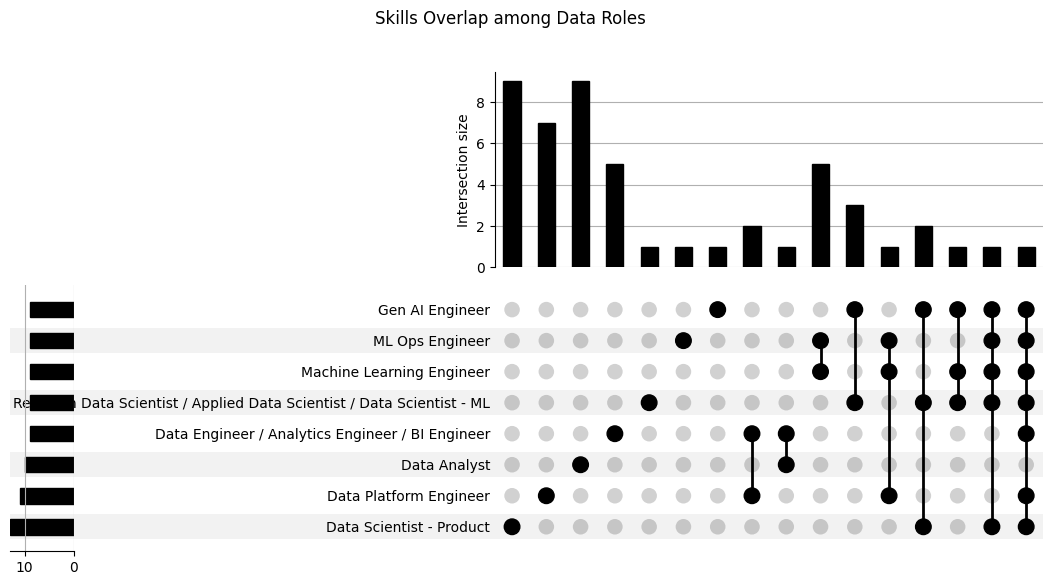

In [23]:
# Define roles and their associated skills
role1 = 'Data Platform Engineer'
role2 = 'Data Engineer / Analytics Engineer / BI Engineer'
role3 = 'Data Analyst'
role4 = 'Data Scientist - Product'
role5 = 'Research Data Scientist / Applied Data Scientist / Data Scientist - ML'
role6 = 'Machine Learning Engineer'
role7 = 'ML Ops Engineer'
role8 = 'Gen AI Engineer'

skills_role1 = set(df[df['role'] == role1]['skill'])
skills_role2 = set(df[df['role'] == role2]['skill'])
skills_role3 = set(df[df['role'] == role3]['skill'])
skills_role4 = set(df[df['role'] == role4]['skill'])
skills_role5 = set(df[df['role'] == role5]['skill'])
skills_role6 = set(df[df['role'] == role6]['skill'])
skills_role7 = set(df[df['role'] == role7]['skill'])
skills_role8 = set(df[df['role'] == role8]['skill'])

# Create a dictionary for the UpSet plot
contents = {
    role1: skills_role1,
    role2: skills_role2,
    role3: skills_role3,
    role4: skills_role4,
    role5: skills_role5,
    role6: skills_role6,
    role7: skills_role7,
    role8: skills_role8
}

# Create the UpSet plot
upset = UpSet(from_contents(contents))
upset.plot()
plt.suptitle('Skills Overlap among Data Roles')
plt.show()